In [1]:
#Machine Learning - Unsupervised is the goal
#Outline of thoughts

#Input#
#Feature vectors are a mix of nominal qualitative data. It has not inherent order so it is not ordinal data.

#The quantitative data is not continuous but discrete because ID's were designed that way.

#One hot encoding applies a vector based on the group

#Output#

#Supervised learning may be needed initially to get us to our goal

#Classification specifically as we may need to train this model to recognize names vs ID's (Does that not need to be done?)

#(Binary classification) = 0 and 1, it either is something or not something (this may be too limited)
#(Multiclass classification) = This can identify multiple classes

#Regression allows us to predict continuous values (This allows us to predict stock prices, temperature tomorrow)


#Model#

#Feature vector = rows in a data set
#Models = Columns in a data set
#All non-output columns and rows = feature matrix/x
#All output columns and rows = labels/target vector/y

#Training, validation and testing set needed from out data set to see how our data generalizes (Big data?)
#We run our training dataset (subset of overall) through out model and then compare our output to the validation data to determine loss.

#We can use neural nets but they are a bit of black box, hard to diagnose why parameters are what they are.
#Random forest, Regression models and support vector machinces may work better.
#Neural nets multiplies each feature vector by a weight, add some bias, and then creates an activation function


#Stage 1: Data collection - Summit has collected for a decade

#State 2: Move/Store - Currently stored in google cloud, I moved it from drive to Kaggle and microsoft onedrive

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#Working directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Limitation of Kaggle Parser base hit with only 4 documents
#May need to upgrade account?
#I May just need alot of free notebooks? I also may just input a specific document for less refinded folders and build a script.


Boss2013 = pd.read_csv('/kaggle/input/boss2013/2013studentReport.csv')

Boss2014 = pd.read_csv('/kaggle/input/boss20142021/2014studentReport.csv')
Boss2015 = pd.read_csv('/kaggle/input/boss20142021/2015studentReport.csv')
Boss2016 = pd.read_csv('/kaggle/input/boss20142021/2016studentReport.csv')
#Boss2017 = pd.read_csv('/kaggle/input/boss20142021/2017studentReport.csv')
#Boss2018 = pd.read_csv('/kaggle/input/boss20142021/2018studentReport.csv')
#Boss2019 = pd.read_csv('/kaggle/input/boss20142021/2019studentReport.csv')
#Boss2020 = pd.read_csv('/kaggle/input/boss20142021/2020studentReport.csv')
#Boss2021 = pd.read_csv('/kaggle/input/boss20142021/2021studentReport.csv')

#This makes sure that all columns are displayed 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

#Output file for future integration
Boss13to16 = "Boss_2013_to_2016.csv"

data = Boss2013

data = data.append(Boss2014)
data = data.append(Boss2015)
data = data.append(Boss2016)

data.head
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boss20142021/2016studentReport.csv
/kaggle/input/boss20142021/2017studentReport.csv
/kaggle/input/boss20142021/2021studentReport.csv
/kaggle/input/boss20142021/2014studentReport.csv
/kaggle/input/boss20142021/2015studentReport.csv
/kaggle/input/boss20142021/2019studentReport.csv
/kaggle/input/boss20142021/2018studentReport.csv
/kaggle/input/boss20142021/2020studentReport.csv
/kaggle/input/boss2013/2013studentReport.csv


<bound method NDFrame.head of       session year location     session  lastname  firstname middlename  \
0             2013       CO  Session 01  albrecht     philip     daniel   
1             2013       CO  Session 01  Aldridge  Dartanian        NaN   
2             2013       CO  Session 01    Amsden     Kamaal       Ross   
3             2013       CO  Session 01  Andersen       Cody      Blain   
4             2013       CO  Session 01  Anderson     Ashton     Taylor   
...            ...      ...         ...       ...        ...        ...   
1826          2016       TN  Session 02    Wilson       Andy        NaN   
1827          2016       TN  Session 02    Wilson     Rachel      Leigh   
1828          2016       TN  Session 02     Wolfe   Katheryn       Anne   
1829          2016       TN  Session 02    Womick      Jacob     Hunter   
1830          2016       TN  Session 02      Yawn     Audrey     Alexis   

     preferred name   birthdate              Account Username  Studen

In [2]:
#Stage 3: Data Cleaning, Exploration and transformation

In [3]:
data.isnull()

,session year,location,session,lastname,firstname,middlename,preferred name,birthdate,Account Username,Student ID,Application ID,student_gender,student_primary_address_country,student_primary_address_01,student_primary_address_02,student_primary_address_city,student_primary_address_state,student_primary_address_zip,student_primary_phone_number,student_primary_phone_number_type,student_alt_phone_number,student_alt_phone_number_type,student_email_address,student_college_country,student_college_city,student_college_state,student_college_name,student_college_graduation_month,student_college_graduation_year,student_college_not_graduating,student_church_pastor_firstname,student_church_pastor_lastname,student_church_youth_pastor_firstname,student_church_youth_pastor_lastname,student_previous_program_reply,student_previous_program_name,student_previous_program_location,student_previous_program_year,high school country,high school city,high school state,last high school attended,high school type,high school graduation date,enrolled in college?,church country,church name,church address,church city,church state,church zip,attended other student programs?,Building on the Rock,Lightbearers,Understanding the Times,Thinking like a Christian,Countering Culture,reference parents,reference friend,reference summit alumni,reference summit rep,reference church leader,reference summit curriculum,reference conference,reference internet search,reference teacher,reference radio,reference other,desire to attend
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True,False,True
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,F

In [4]:
data.isnull().sum()
data.isnull().sum().to_csv

<bound method NDFrame.to_csv of session year                    0
location                        0
session                         0
lastname                        0
firstname                       0
                             ... 
reference internet search    6657
reference teacher            6297
reference radio              6574
reference other              6187
desire to attend             5333
Length: 69, dtype: int64>

In [5]:
data['middlename'] = data['middlename'].fillna('No middlename')
data['preferred name'] = data['preferred name'].fillna('No preferred name')
data.isnull()

,session year,location,session,lastname,firstname,middlename,preferred name,birthdate,Account Username,Student ID,Application ID,student_gender,student_primary_address_country,student_primary_address_01,student_primary_address_02,student_primary_address_city,student_primary_address_state,student_primary_address_zip,student_primary_phone_number,student_primary_phone_number_type,student_alt_phone_number,student_alt_phone_number_type,student_email_address,student_college_country,student_college_city,student_college_state,student_college_name,student_college_graduation_month,student_college_graduation_year,student_college_not_graduating,student_church_pastor_firstname,student_church_pastor_lastname,student_church_youth_pastor_firstname,student_church_youth_pastor_lastname,student_previous_program_reply,student_previous_program_name,student_previous_program_location,student_previous_program_year,high school country,high school city,high school state,last high school attended,high school type,high school graduation date,enrolled in college?,church country,church name,church address,church city,church state,church zip,attended other student programs?,Building on the Rock,Lightbearers,Understanding the Times,Thinking like a Christian,Countering Culture,reference parents,reference friend,reference summit alumni,reference summit rep,reference church leader,reference summit curriculum,reference conference,reference internet search,reference teacher,reference radio,reference other,desire to attend
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,False,True,True,True,True,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,Fals

In [6]:
#I am struggling to debug the issue with why these columns are not showing up on any axis
#remove = ['desire to attend','reference radio', 'reference teacher', 'reference other', 'reference internet search', 'reference conference', 'reference summit curriculum', 'reference church leader', 'reference summit rep', 'reference summit alumni', 'reference friend', 'reference parents', 'Countering Culture', 'Thinking like a Christian', 'Understanding the Times', 'Lightbearers', 'Building on the Rock']
#data.drop(remove, inplace =True, axis=1)

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1826    False
1827    False
1828    False
1829    False
1830    False
Length: 6845, dtype: bool

In [8]:
data.drop_duplicates()

,session year,location,session,lastname,firstname,middlename,preferred name,birthdate,Account Username,Student ID,Application ID,student_gender,student_primary_address_country,student_primary_address_01,student_primary_address_02,student_primary_address_city,student_primary_address_state,student_primary_address_zip,student_primary_phone_number,student_primary_phone_number_type,student_alt_phone_number,student_alt_phone_number_type,student_email_address,student_college_country,student_college_city,student_college_state,student_college_name,student_college_graduation_month,student_college_graduation_year,student_college_not_graduating,student_church_pastor_firstname,student_church_pastor_lastname,student_church_youth_pastor_firstname,student_church_youth_pastor_lastname,student_previous_program_reply,student_previous_program_name,student_previous_program_location,student_previous_program_year,high school country,high school city,high school state,last high school attended,high school type,high school graduation date,enrolled in college?,church country,church name,church address,church city,church state,church zip,attended other student programs?,Building on the Rock,Lightbearers,Understanding the Times,Thinking like a Christian,Countering Culture,reference parents,reference friend,reference summit alumni,reference summit rep,reference church leader,reference summit curriculum,reference conference,reference internet search,reference teacher,reference radio,reference other,desire to attend
0,2013,CO,Session 01,albrecht,philip,daniel,philip,1996-6-8,mountainsmiles@gmail.com,522,522,m,United States,3326 W. Saratoga Ave.,NaN,Englewood,CO,80110,3037943467,Home / Landline,7203501015,Cell / Mobile,minenotyoursphilip@gmail.com,NaN,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,United States,LITTLETON,CO,ROCK SOLID HIGH SCHOOL,Private,6/2014,n,United States,Master's Hands Bible Church,3326 W Saratoga Ave.,Englewood,CO,80110,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN
1,2013,CO,Session 01,Aldridge,Dartanian,No middlename,Dart,1996-7-8,50calibergun@gmail.com,480,480,m,United States,28765 Brewer Rd,28765 Brewer Rd,Soldotna,AK,99669,9072625205,Home / Landline,9072625205,Home / Landline,50calibergun@gmail.com,NaN,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,United States,SOLDOTNA,AK,COOK INLET ACADEMY,Private,5/2014,n,United States,Our Lady Of Perpetual Help,222 W Rebout Ave,Soldotna,AK,99669,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN
2,2013,CO,Session 01,Amsden,Kamaal,Ross,Kamaal,1991-12-20,pat.amsden@campappanoose.org,1174,1174,m,United States,12971 137th Avenue,NaN,Plano,IA,52581,6418950295,Cell / Mobile,6418953086,Cell / Mobile,pat.amsden@campappanoose.org,NaN,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,United States,MARTENSDALE,IA,MARTENSDALE ST MARYS CMTY SCH,Public,6/2011,n,United States,Brushy Community Church,Highway S70,Plano,IA,52581,n,NaN,NaN,NaN,NaN,NaN,x,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,CO,Session 01,Andersen,Cody,Blain,Cody,1994-1-7,bkandersen@hotmail.com,1713,1713,m,United States,15055 Wellwood Drive,NaN,Elbert,CO,80106,719-494-1938,Home / Landline,719-648-1122,Cell / Mobile,luvfmx123@gmail.com,United States,COLORADO SPRINGS,CO,PIKES PEAK COMMUNITY COLLEGE,12.0,2014.0,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,United States,Colorado Springs,CO,Edison Academy (Dual Enrollment),Home,5/2013,y,United States,Mountain Springs Church,7345 Adventure Way,Colorado Springs,CO,80923,n,NaN,NaN,NaN,NaN,NaN,x,x,x,NaN,NaN,x,NaN,NaN,NaN,NaN,x,NaN
4,2013,CO,Session 01,Anderson,Ashton,Taylor,No preferred name,1996-9-9,macand4@msn.com,397,397,f,United States,151 Mountain Cloud Cir,NaN,Highlands Ranch,CO,80126,3033463294,Home / Landline,7202710005,Cell / Mobile,ashton.anderson@live.com,NaN,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,United States,Highlands Ranch,CO,Rock Solid High School,Home,5/2014,n,United States,Living Way Fellowship,345 E Wil

In [9]:
data.describe()

,session year,Student ID,Application ID,student_college_graduation_month,student_college_graduation_year,desire to attend
count,6845.000000,6845.000000,6845.000000,1162.000000,2292.000000,1512.000000
mean,2014.553104,4616.340979,5129.291746,5.735800,2009.162740,7.594577
std,1.116657,2728.453664,2991.155091,2.009857,8.273329,3.399155
min,2013.000000,10.000000,10.000000,1.000000,1973.000000,0.000000
25%,2014.000000,2257.000000,2631.000000,5.000000,2001.000000,7.000000
50%,2015.000000,4550.000000,5200.000000,5.000000,2013.000000,9.000000
75%,2016.000000,6986.000000,7846.000000,5.000000,2017.000000,10.000000
max,2016.000000,9500.000000,10352.000000,12.000000,2022.000000,10.000000


In [10]:
    data['student_alt_phone_number_type'] = data['student_alt_phone_number_type'].str.lower()
    data.loc[:, "student_alt_phone_number_type"]

0         cell / mobile
1       home / landline
2         cell / mobile
3         cell / mobile
4         cell / mobile
             ...       
1826                NaN
1827    home / landline
1828      cell / mobile
1829      cell / mobile
1830                NaN
Name: student_alt_phone_number_type, Length: 6845, dtype: object

In [11]:
data['Account Username'] = data['Account Username'].str.title()
data

,session year,location,session,lastname,firstname,middlename,preferred name,birthdate,Account Username,Student ID,Application ID,student_gender,student_primary_address_country,student_primary_address_01,student_primary_address_02,student_primary_address_city,student_primary_address_state,student_primary_address_zip,student_primary_phone_number,student_primary_phone_number_type,student_alt_phone_number,student_alt_phone_number_type,student_email_address,student_college_country,student_college_city,student_college_state,student_college_name,student_college_graduation_month,student_college_graduation_year,student_college_not_graduating,student_church_pastor_firstname,student_church_pastor_lastname,student_church_youth_pastor_firstname,student_church_youth_pastor_lastname,student_previous_program_reply,student_previous_program_name,student_previous_program_location,student_previous_program_year,high school country,high school city,high school state,last high school attended,high school type,high school graduation date,enrolled in college?,church country,church name,church address,church city,church state,church zip,attended other student programs?,Building on the Rock,Lightbearers,Understanding the Times,Thinking like a Christian,Countering Culture,reference parents,reference friend,reference summit alumni,reference summit rep,reference church leader,reference summit curriculum,reference conference,reference internet search,reference teacher,reference radio,reference other,desire to attend
0,2013,CO,Session 01,albrecht,philip,daniel,philip,1996-6-8,Mountainsmiles@Gmail.Com,522,522,m,United States,3326 W. Saratoga Ave.,NaN,Englewood,CO,80110,3037943467,Home / Landline,7203501015,cell / mobile,minenotyoursphilip@gmail.com,NaN,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,United States,LITTLETON,CO,ROCK SOLID HIGH SCHOOL,Private,6/2014,n,United States,Master's Hands Bible Church,3326 W Saratoga Ave.,Englewood,CO,80110,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN
1,2013,CO,Session 01,Aldridge,Dartanian,No middlename,Dart,1996-7-8,50Calibergun@Gmail.Com,480,480,m,United States,28765 Brewer Rd,28765 Brewer Rd,Soldotna,AK,99669,9072625205,Home / Landline,9072625205,home / landline,50calibergun@gmail.com,NaN,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,United States,SOLDOTNA,AK,COOK INLET ACADEMY,Private,5/2014,n,United States,Our Lady Of Perpetual Help,222 W Rebout Ave,Soldotna,AK,99669,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN
2,2013,CO,Session 01,Amsden,Kamaal,Ross,Kamaal,1991-12-20,Pat.Amsden@Campappanoose.Org,1174,1174,m,United States,12971 137th Avenue,NaN,Plano,IA,52581,6418950295,Cell / Mobile,6418953086,cell / mobile,pat.amsden@campappanoose.org,NaN,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,United States,MARTENSDALE,IA,MARTENSDALE ST MARYS CMTY SCH,Public,6/2011,n,United States,Brushy Community Church,Highway S70,Plano,IA,52581,n,NaN,NaN,NaN,NaN,NaN,x,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,CO,Session 01,Andersen,Cody,Blain,Cody,1994-1-7,Bkandersen@Hotmail.Com,1713,1713,m,United States,15055 Wellwood Drive,NaN,Elbert,CO,80106,719-494-1938,Home / Landline,719-648-1122,cell / mobile,luvfmx123@gmail.com,United States,COLORADO SPRINGS,CO,PIKES PEAK COMMUNITY COLLEGE,12.0,2014.0,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,United States,Colorado Springs,CO,Edison Academy (Dual Enrollment),Home,5/2013,y,United States,Mountain Springs Church,7345 Adventure Way,Colorado Springs,CO,80923,n,NaN,NaN,NaN,NaN,NaN,x,x,x,NaN,NaN,x,NaN,NaN,NaN,NaN,x,NaN
4,2013,CO,Session 01,Anderson,Ashton,Taylor,No preferred name,1996-9-9,Macand4@Msn.Com,397,397,f,United States,151 Mountain Cloud Cir,NaN,Highlands Ranch,CO,80126,3033463294,Home / Landline,7202710005,cell / mobile,ashton.anderson@live.com,NaN,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,NaN,United States,Highlands Ranch,CO,Rock Solid High School,Home,5/2014,n,United States,Living Way Fellowship,345 E Wil

In [12]:
#Stage 4: 

#4.1 Data Aggregation  and Labeling

In [13]:
data.groupby('session year').sum()

,Student ID,Application ID,student_college_graduation_month,student_college_graduation_year,desire to attend
session year,,,,,
2013,1811375,1811375,1295.0,2698418.0,17.0
2014,5673151,6215248,1290.0,447496.0,157.0
2015,9566459,10772833,1603.0,548615.0,674.0
2016,14547869,16310546,2477.0,910472.0,10635.0


In [14]:
data.groupby(['session year'])['firstname'].count()

session year
2013    1590
2014    1710
2015    1714
2016    1831
Name: firstname, dtype: int64

In [15]:
#Key aggregation, how many conferences did each student attend?
data.groupby(['firstname'])['session'].count()

firstname
AARON HIDEO     1
ANAHI           1
AREUM           1
Aaron          28
Aaryn           1
               ..
shelly          1
sloane          1
tanner          1
taylor          2
zachary         2
Name: session, Length: 1704, dtype: int64

In [16]:
data.groupby(['firstname','session year'])[['session','location']].count()

session  location
firstname   session year                   
AARON HIDEO 2015                1         1
ANAHI       2016                1         1
AREUM       2013                1         1
Aaron       2013               12        12
            2014                2         2
...                           ...       ...
sloane      2014                1         1
tanner      2015                1         1
taylor      2013                1         1
            2016                1         1
zachary     2013                2         2

[2884 rows x 2 columns]

In [17]:
#4.2 Analytics & Metrics

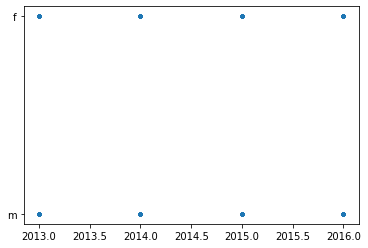

In [18]:
#Next step is to plan out a graphical approach
plt.plot(data['session year'],data['student_gender'],'.')

In [19]:
randomPoints=np.random.randn(100,2);
df = pd.DataFrame(randomPoints, columns = ['session year', 'student_gender'])
df.head()

,session year,student_gender
0,0.660329,-0.005708
1,0.367135,-1.838406
2,-1.860526,1.273362
3,0.362200,-2.073449
4,-0.685710,1.436479


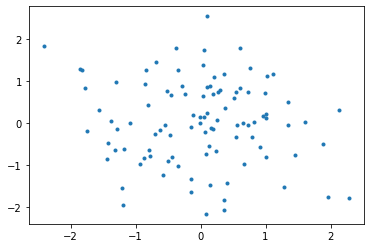

In [20]:
plt.plot(df['session year'], df['student_gender'], '.')

/opt/conda/lib/python3.7/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


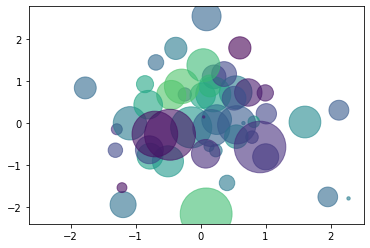

In [21]:
randomcolor = np.random.randn(100)
r_random_point=1000*np.random.randn(100)
plt.scatter(df['session year'], df['student_gender'], s=r_random_point, alpha = 0.6, c = randomcolor)